# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
> Manhattan is the most expensive bourough on average.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
! git clone https://github.com/DS3001/linearRegression

fatal: destination path 'linearRegression' already exists and is not an empty directory.


In [7]:
df = pd.read_csv('/content/linearRegression/data/Q1_clean.csv')
# list(df.columns)
df.rename(columns={"Neighbourhood ": "Neighborhood"}, inplace = True) # neighbourhood column has space after it

# moving random property types to "Other"
df.loc[df['Property Type'].isin(['Hut', 'Castle', 'Chalet','Lighthouse', 'Cabin', 'Treehouse', 'Bungalow', 'Camper/RV', 'Villa','Boat', 'Dorm']), 'Property Type'] = "Other"
print(df["Property Type"].value_counts())

Apartment          19656
House               1559
Loft                 591
Bed & Breakfast      136
Townhouse             83
Other                 80
Condominium           48
Name: Property Type, dtype: int64


Neighborhood
Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
Name: Price, dtype: float64


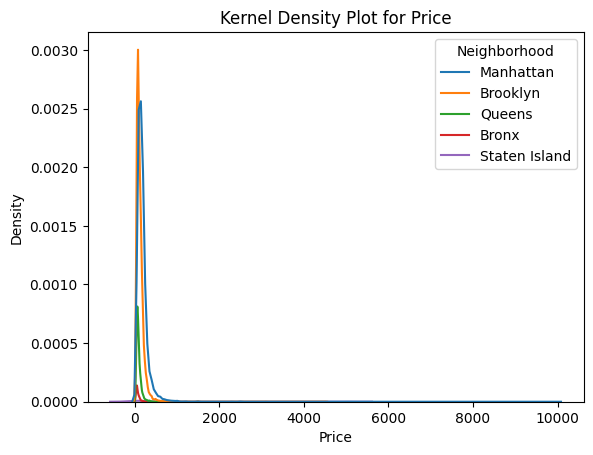

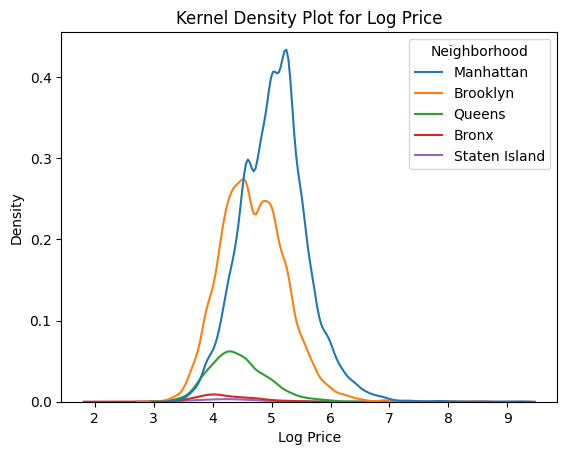

In [8]:
print(df.groupby('Neighborhood')["Price"].mean())
# Manhattan is the most expensive on average
df.groupby('Neighborhood')["Review Scores Rating"].mean()

sns.kdeplot(data=df,x='Price',hue='Neighborhood')
plt.title("Kernel Density Plot for Price")
plt.show()

df['Log Price'] = np.log(df['Price'])
sns.kdeplot(data=df,x='Log Price',hue='Neighborhood')
plt.title("Kernel Density Plot for Log Price")
plt.show()

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
> The coefficients are identical to the average price in the table from part 1. The coefficients represent the effect of being in that neighborhood compared to some reference neighborhood, so the model is likely just estimating the average price for each neighborhood.

In [9]:
from sklearn.linear_model import LinearRegression # Import linear regression model

# Target Variable
y = df['Price']

ddf = pd.get_dummies(df['Neighborhood'],dtype='int')
ddf.head()
reg = LinearRegression(fit_intercept=False).fit(ddf, y) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(ddf, y)) # R squared measure
results

R-squared:  0.04631389606035197


,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
> When creating the dummies, we need to drop on of the dummy variables. The coefficients represent the price differences compared to the reference category, which in this case, is the Bronx.


In [10]:
ddf =pd.get_dummies(df['Neighborhood'],drop_first=True)
reg = LinearRegression().fit(ddf, y)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print('R-squared: ', reg.score(ddf, y)) # R squared measure
results

R-squared:  0.04631389606035197


,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
> The most expensive propterty you can rent is still in Manhattan, with the higher the reviews score rating, the more expensive, which in this case, should be capped at the highest rating of 100.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighborhood']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

X_train = pd.concat([X_train['Review Scores Rating'],pd.get_dummies(X_train['Neighborhood'],dtype='int') ], axis = 1) # new x train with dummies
X_test = pd.concat([X_test['Review Scores Rating'],pd.get_dummies(X_test['Neighborhood'],dtype='int') ], axis = 1) # new x test with dummies

reg = LinearRegression(fit_intercept = False).fit(X_train, y_train)
y_pred = reg.predict(X_test)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X_train, y_train)) # R squared measure
mse = mean_squared_error(y_test, y_pred) # mean square error
print('RMSE: ', np.sqrt(mse)) # root mean square error
results

R-squared:  0.04737029329130338
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
> Condominium as it has the highest coefficient.


In [12]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighborhood', 'Property Type']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

X_train = pd.concat([X_train['Review Scores Rating'],pd.get_dummies(X_train['Neighborhood'],dtype='int'), pd.get_dummies(X_train['Property Type'],dtype='int') ], axis = 1) # new x train with dummies
X_test = pd.concat([X_test['Review Scores Rating'],pd.get_dummies(X_test['Neighborhood'],dtype='int'), pd.get_dummies(X_test['Property Type'],dtype='int')], axis = 1) # new x test with dummies

reg = LinearRegression(fit_intercept = False).fit(X_train, y_train)
y_pred = reg.predict(X_test)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X_train, y_train)) # R squared measure
mse = mean_squared_error(y_test, y_pred) # mean square error
print('RMSE: ', np.sqrt(mse)) # root mean square error
results

R-squared:  0.0565128162016848
RMSE:  124.45504696283301


,variable,coefficient
0,Review Scores Rating,1.020469
1,Bronx,-20.674251
2,Brooklyn,36.167063
3,Manhattan,98.749697
4,Queens,6.824249
5,Staten Island,52.249709
6,Apartment,-9.908479
7,Bed & Breakfast,-41.260929
8,Condominium,84.944990
9,House,23.201774


6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
> The coefficient on Review Scores Rating decreased slightly from part 4 to part 5, meaning that it is less of an impact on the 'Price' variable's variation when 'Property Type' is considered.


7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?
> Note: I could not get #7 to run without an error but I noticed that the answer key used `Room Type` instead of `Property Type` for all of Q1 so when I changed it the code worked so to answer the questions I will refer to the pt.5 in the key since it also compared the room.

> Compared to pt. 5 in the key, the review scores rating slightly increases, the $R^2$ slightly decreases while the RMSE mostly stays the same.  The coefficients do not appear to be just the sum of the individual coefficients. The most expensive property would be an entire home/apt in Staten Island.

In [13]:
df['interactions'] = 'A '+ df['Room Type'].astype('str')+' in '+df['Neighborhood'].astype('str')
X = df.loc[:,['Review Scores Rating', 'interactions']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

X_train = pd.concat([X_train['Review Scores Rating'],pd.get_dummies(X_train['interactions'],dtype='int') ], axis = 1) # new x train with dummies
X_test = pd.concat([X_test['Review Scores Rating'],pd.get_dummies(X_test['interactions'],dtype='int')], axis = 1) # new x test with dummies

reg = LinearRegression(fit_intercept = False).fit(X_train, y_train)
y_pred = reg.predict(X_test)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X_train, y_train)) # R squared measure
mse = mean_squared_error(y_test, y_pred) # mean square error
print('RMSE: ', np.sqrt(mse)) # root mean square error
results

R-squared:  0.17046656126002335
RMSE:  114.10298034724305


,variable,coefficient
0,Review Scores Rating,0.631849
1,A Entire home/apt in Bronx,63.133021
2,A Entire home/apt in Brooklyn,113.784926
3,A Entire home/apt in Manhattan,169.494389
4,A Entire home/apt in Queens,81.969775
5,A Entire home/apt in Staten Island,234.958943
6,A Private room in Bronx,3.736301
7,A Private room in Brooklyn,20.579025
8,A Private room in Manhattan,45.531833
9,A Private room in Queens,11.532383


**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [38]:
df = pd.read_csv('/content/linearRegression/data/cars_hw.csv')
list(df.columns)
df.head()
# sns.boxplot(df['Price']) # lots of outliers in the upper range
df['arcPrice'] = np.arcsinh(df['Price'])
df['arcMileage'] = np.arcsinh(df['Mileage_Run'])

  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  > The most expensive car brands include MG Motors and Kia. The average prices are all in an order of magnitude of 1e+05 to 1e+06.


,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


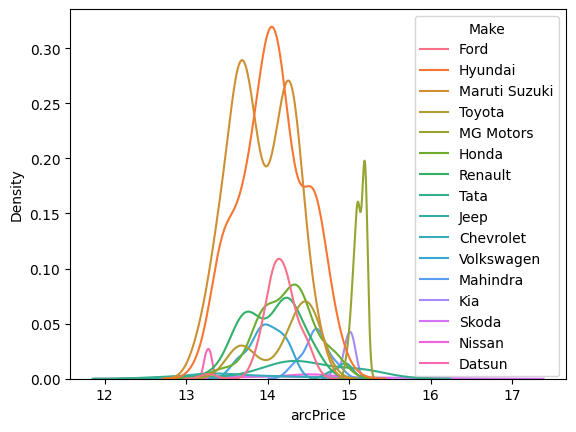

In [57]:
sns.kdeplot(data = df, x='arcPrice',hue='Make')
df['Price'].groupby(df['Make']).describe()

3. Split the data into an 80% training set and a 20% testing set.
4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
> For the numerical vaiables, the $R^2$ and `RMSE` on the test set are 0.48 and 0.32, respectively. For the cateogrical variables, the $R^2$ and `RMSE` on the test set are 0.63 and 0.26, respectively. For the third combined model, the $R^2$ and `RMSE` on the test set are 0.80 and 0.19, respectively, meaning that this model performs the best by a decent amount.

In [58]:
from sklearn.model_selection import train_test_split
# could not get sklearn train_test_split to work with categorical variables, referred to solutions for code on splitting
y = df['arcPrice']
#df.dtypes()
df.loc[df['No_of_Owners'].isin(['1st']), 'No_of_Owners'] = 1 # change no of owners from str to int
df.loc[df['No_of_Owners'].isin(['2nd']), 'No_of_Owners'] = 2
df.loc[df['No_of_Owners'].isin(['3rd']), 'No_of_Owners'] = 3
df['No_of_Owners'] = pd.to_numeric(df['No_of_Owners'], errors='coerce')

# X = df.loc[:, df.columns != 'Price']
# X = df.loc[:, df.columns != 'arcPrice']
X = df.sample(frac=1, random_state=100)

# How to do the split as needed:
N = df.shape[0]
df = df.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)

X_train = X[0:train_size]
y_train = X_train['arcPrice']

X_test = X[train_size:]
y_test = X_test['arcPrice']

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)
X_train_num = X_train.loc[:,['Make_Year', 'arcMileage', 'Seating_Capacity', 'No_of_Owners']] # numeric only
X_test_num = X_test.loc[:,['Make_Year', 'arcMileage', 'Seating_Capacity', 'No_of_Owners']] # numeric only

# Use a loop to make the dummy dataframe, but you could do it by hand in a bunch of lines:
dummies = pd.DataFrame([]) # In general, use lists and append instead of DataFrame and pd.concat
var_cat = ['Make', 'Color', 'Body_Type', 'Fuel_Type','Transmission', 'Transmission_Type']
for var in var_cat:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)
    X_train_cat = dummies.iloc[0:train_size,:]
    X_test_cat = dummies.iloc[train_size:,:]

reg_num = LinearRegression().fit(X_train_num, y_train)
y_pred_num = reg_num.predict(X_test_num)
print('R-squared Numerical: ', reg_num.score(X_test_num, y_test)) # R squared measure
mse = mean_squared_error(y_test, y_pred_num) # mean square error
print('RMSE Numerical: ', np.sqrt(mse)) # root mean square error

reg_cat = LinearRegression().fit(X_train_cat, y_train)
y_pred_cat = reg_cat.predict(X_test_cat)
print('R-squared Categorical: ', reg_cat.score(X_test_cat, y_test)) # R squared measure
mse = mean_squared_error(y_test, y_pred_cat) # mean square error
print('RMSE Categorical: ', np.sqrt(mse)) # root mean square error


R-squared Numerical:  0.46268174357901093
RMSE Numerical:  0.34134242430681233
R-squared Categorical:  0.6291274883733313
RMSE Categorical:  0.2835873099138166


In [60]:
# combined
X_train_all = pd.concat([X_train_num, X_train_cat],axis=1, ignore_index=True)
X_test_all = pd.concat([X_test_num, X_test_cat],axis=1, ignore_index=True)

reg = LinearRegression().fit(X_train_all, y_train)
y_pred = reg.predict(X_test_all)
print('R-squared Categorical: ', reg_cat.score(X_test_all, y_test)) # R squared measure
mse = mean_squared_error(y_test, y_pred) # mean square error
print('RMSE Categorical: ', np.sqrt(mse)) # root mean square error


R-squared Categorical:  0.8037674595389735
RMSE Categorical:  0.20628135875812384


5. Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the  R2  and RMSE change? At what point does  R2  go negative on the test set? For your best model with expanded features, what is the  R2  and RMSE? How does it compare to your best model from part 4?
> As the degree increases from 1 to 2, the R2 increases slightly while the RMSE decreases slightly. R2 goes negative at a degree of 4. After that, the performances only deteriorates, meaning that the best model with expanded features is with a degree of 2, which has a R2 of 0.48 and a RMSE of 0.31. However, the best model from part 4 is still better.


In [61]:
## Polynomial features:
from sklearn.preprocessing import PolynomialFeatures
for degree in range(4):
  expander = PolynomialFeatures(degree=degree+1,include_bias=False) # Create the expander
  Z_train = expander.fit_transform(X_train_num) # Pass the df into the expander to get powers/interactions of x and y
  names = expander.get_feature_names_out() # Get the names of these variables
  X_train = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
  Z_test = expander.fit_transform(X_test_num) # Pass the df into the expander to get powers/interactions of x and y
  names = expander.get_feature_names_out() # Get the names of these variables
  X_test = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

  reg_cat = LinearRegression().fit(X_train, y_train)
  y_pred = reg_cat.predict(X_test)
  print('R-squared Categorical: ', reg_cat.score(X_test, y_test)) # R squared measure
  mse = mean_squared_error(y_test, y_pred) # mean square error
  print('RMSE Categorical: ', np.sqrt(mse)) # root mean square error

R-squared Categorical:  0.4626817435790106
RMSE Categorical:  0.34134242430681244
R-squared Categorical:  0.465290714743273
RMSE Categorical:  0.3405127147327204
R-squared Categorical:  -11423.312672096436
RMSE Categorical:  49.77250634541009
R-squared Categorical:  -25023.05856807968
RMSE Categorical:  73.66366865929206


6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
>The values roughly line up along the diagonal. The residual look roughly bell-shaped around zero with a slight right tail. There appear some untreated outliers or discrepancies in the data at the upper range of price which need further investigation.

R-squared Categorical:  0.8037674595389735
RMSE Categorical:  0.2835873099138166


<Axes: xlabel='arcPrice'>

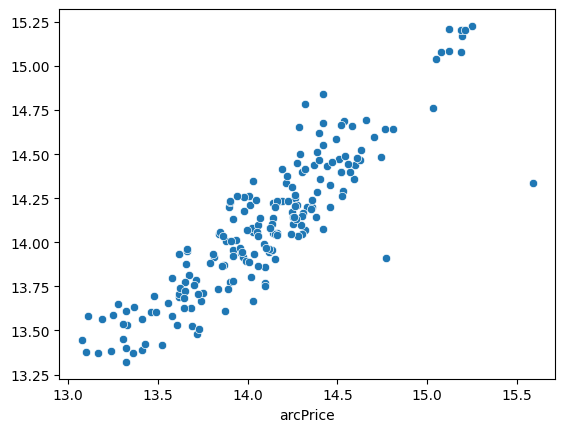

In [64]:
# using the combined model in part 4
X_train_all = pd.concat([X_train_num, X_train_cat],axis=1, ignore_index=True)
X_test_all = pd.concat([X_test_num, X_test_cat],axis=1, ignore_index=True)

reg = LinearRegression().fit(X_train_all, y_train)
y_pred = reg.predict(X_test_all)
print('R-squared Categorical: ', reg.score(X_test_all, y_test)) # R squared measure
mse = mean_squared_error(y_test, y_pred_cat) # mean square error
print('RMSE Categorical: ', np.sqrt(mse)) # root mean square error
sns.scatterplot(x = y_test,y = y_pred)

<Axes: xlabel='arcPrice', ylabel='Density'>

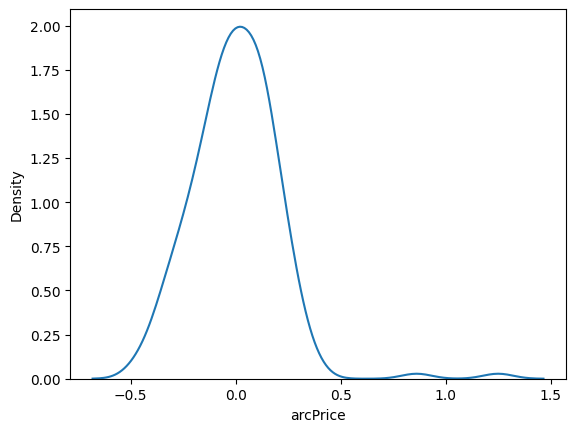

In [65]:
residuals = y_test - y_pred
sns.kdeplot(residuals)